# Case study on Supervised learning

### Importing relevant libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

## 1. Loaded the dataset into python environment:

In [6]:
df = pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Preprocessing the dataset: 

In [7]:
df.shape

(150, 5)

### Insight:
    
This data frame contains 150 samples under the 5 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dealing the null values present in the dataset:

In [10]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Insight:
A total of 19 null values are present in the four features of the dataset. 

In [11]:
df.loc[df['SL'].isnull()]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [12]:
df.loc[df['SW'].isnull()]

,SL,SW,PL,PW,Classification
10,5.4,NaN,1.5,0.2,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
72,6.3,NaN,4.9,1.5,Iris-versicolor
98,5.1,NaN,3.0,1.1,Iris-versicolor
124,6.7,NaN,5.7,2.1,Iris-virginica


In [13]:
df.loc[df['PL'].isnull()]

,SL,SW,PL,PW,Classification
28,5.2,3.4,NaN,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
56,6.3,3.3,NaN,1.6,Iris-versicolor
94,5.6,2.7,NaN,1.3,Iris-versicolor
109,7.2,3.6,NaN,2.5,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica


In [14]:
df['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

<AxesSubplot:ylabel='Density'>

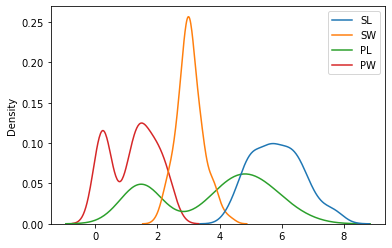

In [15]:
sns.kdeplot(data=df)

<AxesSubplot:xlabel='PW', ylabel='Density'>

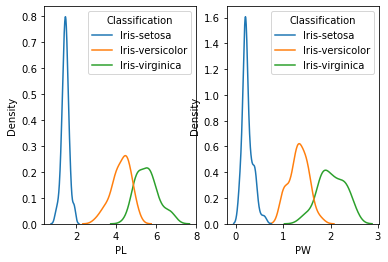

In [16]:
plt.subplot(1, 2, 1)
sns.kdeplot(data = df, x='PL', hue='Classification')

plt.subplot(1, 2, 2)
sns.kdeplot(data = df, x = 'PW', hue = 'Classification')

In [17]:
df.groupby('Classification')['SL'].mean()

Classification
Iris-setosa        5.008511
Iris-versicolor    5.925000
Iris-virginica     6.616667
Name: SL, dtype: float64

In [18]:
df['SL'].fillna(df.groupby('Classification')['SL'].transform('mean'), inplace=True)

In [19]:
df['SL'].isnull().sum()

0

In [20]:
df.loc[[2, 21, 39, 51, 85, 106, 141]]

,SL,SW,PL,PW,Classification
2,5.008511,3.2,1.3,0.2,Iris-setosa
21,5.008511,3.7,1.5,0.4,Iris-setosa
39,5.008511,3.4,1.5,0.2,Iris-setosa
51,5.925000,3.2,4.5,1.5,Iris-versicolor
85,5.925000,3.4,4.5,1.6,Iris-versicolor
106,6.616667,2.5,4.5,1.7,Iris-virginica
141,6.616667,3.1,5.1,2.3,Iris-virginica


In [21]:
df['SW'].fillna(df.groupby('Classification')['SW'].transform('mean'), inplace=True)

In [22]:
df['SW'].isnull().sum()

0

In [23]:
df.groupby('Classification')['SW'].mean()

Classification
Iris-setosa        3.408511
Iris-versicolor    2.781250
Iris-virginica     2.967347
Name: SW, dtype: float64

In [24]:
df.loc[[10, 27, 43, 72, 98, 124]]

,SL,SW,PL,PW,Classification
10,5.4,3.408511,1.5,0.2,Iris-setosa
27,5.2,3.408511,1.5,0.2,Iris-setosa
43,5.0,3.408511,1.6,0.6,Iris-setosa
72,6.3,2.781250,4.9,1.5,Iris-versicolor
98,5.1,2.781250,3.0,1.1,Iris-versicolor
124,6.7,2.967347,5.7,2.1,Iris-virginica


In [25]:
df.groupby('Classification')['PL'].mean()

Classification
Iris-setosa        1.468750
Iris-versicolor    4.252083
Iris-virginica     5.547917
Name: PL, dtype: float64

In [26]:
df.groupby('Classification')['PL'].median()

Classification
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PL, dtype: float64

In [27]:
df['PL'].fillna(df.groupby('Classification')['PL'].transform('mean'), inplace=True)

In [28]:
df['PL'].isnull().sum()

0

In [29]:
df.loc[[28, 42, 56, 94, 109, 147]]

,SL,SW,PL,PW,Classification
28,5.2,3.4,1.468750,0.2,Iris-setosa
42,4.4,3.2,1.468750,0.2,Iris-setosa
56,6.3,3.3,4.252083,1.6,Iris-versicolor
94,5.6,2.7,4.252083,1.3,Iris-versicolor
109,7.2,3.6,5.547917,2.5,Iris-virginica
147,6.5,3.0,5.547917,2.0,Iris-virginica


In [30]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Insight:
    
All the null values have been removed from the dataset. 

### Checking for outliers in the dataset:

<AxesSubplot:>

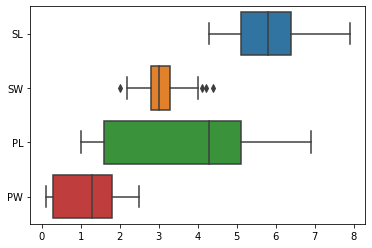

In [31]:
sns.boxplot(data=df, orient='h')

In [32]:
q1 = df['SW'].quantile(q=0.25, interpolation='midpoint')
q3 = df['SW'].quantile(q=0.75, interpolation='midpoint')
iqr = q3 - q1
q_limit = 1.5 * (iqr)

In [33]:
print(q1, q3, iqr, q_limit)

2.8 3.3 0.5 0.75


In [34]:
lower_limit = q1 - q_limit
upper_limit = q3 + q_limit

In [35]:
print(lower_limit, upper_limit)

2.05 4.05


In [36]:
df.loc[(df['SW'] > 4.05) ^ (df['SW'] < 2.05)]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


### Insight:
    
Since there are only four outliers present in the dataset and also the four values are not showing a huge difference.
Hence the outliers are left unedited.

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Now, it's time to determine the best suitable algorithm for getting effective accuracy.

Here, we are going to evaluate five famous frequently used algorithms such as

Logistic regression

K-Nearest Neighbors (k-NN)

Support Vector Machine

Decision tree classifier

Random Forest Classifier


##  Label Encoder:

In [37]:
label_encoder = preprocessing.LabelEncoder()

<AxesSubplot:>

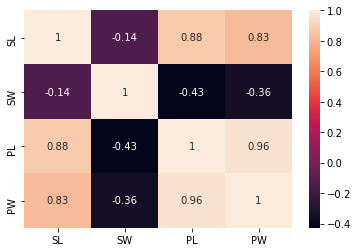

In [38]:
corr_matrix = df.drop('Classification', axis=1).corr()
sns.heatmap(corr_matrix, annot=True)

In [39]:
X = df.drop('Classification', axis = 1)
y = df['Classification']

In [40]:
y = label_encoder.fit_transform(y)

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
scalar = preprocessing.StandardScaler()

In [43]:
X = scalar.fit_transform(X)

## Logistic regression:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [45]:
logit_regrsn = LogisticRegression()
model = logit_regrsn.fit(X_train, y_train)

In [46]:
predictions = model.predict(X_test)

In [47]:
print("Accuracy score is: ", accuracy_score(y_test, predictions))

Accuracy score is:  0.9666666666666667


In [48]:
predictions == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [49]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [50]:
label_encoder.inverse_transform(predictions)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [51]:
label_encoder.inverse_transform(model.predict([[6, 3, 5, 2]]))

array(['Iris-virginica'], dtype=object)

### Cross validating the score for better result:

In [52]:
scores = cross_val_score(logit_regrsn, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         1.         1.         1.         0.93333333 0.93333333
 0.8        1.         1.         1.        ]


In [53]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 6.15


### Insight:

Performing Logistic Regression, after the cross validation the accuracy score is 96.67 with a standard deviation of 6.15.    

## K-Nearest Neighbors (k-NN):

In [54]:
accu_values = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    accu_values.append(acc_score)

In [55]:
print(accu_values)

[1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


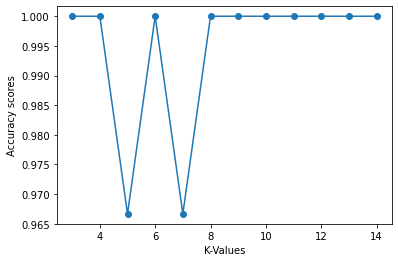

In [56]:
plt.plot(neighbors, accu_values, 'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy scores')
plt.show()

In [57]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score * 100, '%')

100.0 %


In [58]:
scores = cross_val_score(classifier, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 1.         1.
 0.93333333 0.93333333 1.         0.93333333]


In [59]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 3.33


### Insight:
Performing k-NN, after the cross validation the accuracy score is 96.67 with a standard deviation of 3.33.

## Support Vector Machine:

Trying the samples with different kernels.

In [60]:
supp_vector = SVC(kernel='linear')
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [61]:
accuracy_score(y_test, svm_predictions)

0.9666666666666667

In [62]:
supp_vector = SVC(kernel='poly', degree=3)
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [63]:
accuracy_score(y_test, svm_predictions)

0.9333333333333333

In [64]:
supp_vector = SVC(kernel='rbf')
svm_model = supp_vector.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [65]:
accuracy_score(y_test, svm_predictions)

0.9666666666666667

In [66]:
scores = cross_val_score(supp_vector, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 1.         0.93333333
 0.86666667 1.         1.         1.        ]


In [67]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 96.67  Standard dev 4.47


### Insight:
Performing Support Vector Machine, after the cross validation the accuracy score is 96.67 with a standard deviation of 4.47.

## Decision Tree Classifier:

In [68]:
dt_classifier = DecisionTreeClassifier()
dt_model = dt_classifier.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)

In [69]:
accuracy_score(dt_predict, y_test)

1.0

In [70]:
scores = cross_val_score(dt_classifier, X,y, scoring="accuracy", cv=10)
print(scores)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [71]:
print(f"Accuracy {np.round( scores.mean()*100,2)}  Standard dev {np.round( scores.std()*100,2)}")

Accuracy 95.33  Standard dev 4.27


### Insight:
Performing Decision Tree Classifier, after the cross validation the accuracy score is 95.33 with a standard deviation of 4.27.

## Random Forest Classifier:

In [72]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train) 
rf_predict = rf_model.predict(X_test)

In [73]:
accuracy_score(rf_predict, y_test)

1.0

In [74]:
f1_score(rf_predict, y_test, average='micro')

1.0

In [75]:
x_df = df.drop('Classification', axis = 1)
pd.Series(rf_model.feature_importances_, index=x_df.columns).sort_values(ascending=False) * 100

PW    45.735136
PL    41.254317
SL    10.486772
SW     2.523774
dtype: float64

In [76]:
parameters ={'max_depth': [10, 20, 30],
'criterion' : ['gini', 'entropy'],
'min_samples_split': [2,5,10],
'n_estimators': [100,200,400]}

In [77]:
param_size = ParameterGrid(parameters)
len(param_size)

54

In [ ]:
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(grid_search, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

# Conclusion:

* The K-Nearest Neighbors (k-NN) model appears to show a high score of accuracy 96.67 with a standard deviation of 3.33.

* From testing all of the machine learning models, K-NN machine learning model is giving the best prediction for iris dataset.